**TAREA 4 - ALGORITMOS DE APRENDIZAJE NO SUPERVISADO**

**Realizado por:**

**LUIS CARLOS PIMIENTA HENAO**

**Grupo: 202016908_1**

**UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD**

**PROGRAMA DE INGENIERIA DE SISTEMAS**

**ANALISIS DE DATOS**

**BARRANQUILLA (ATLÁNTICO)**

**ABRIL 2024.**


**HIERARCHICAL**

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [1]:
#Cargar Librerias.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score 

import warnings
warnings.filterwarnings('ignore')

In [2]:
Datos = pd.read_csv('Mall_Customers.csv')
Datos.head(10)

,Cedula,Genero,Edad,Ingreso_Anual,Puntos_Compra (1-100)
0,1,Masculino,19,15,39
1,2,Masculino,21,15,81
2,3,Femenino,20,16,6
3,4,Femenino,23,16,77
4,5,Femenino,31,17,40
5,6,Femenino,22,17,76
6,7,Femenino,35,18,6
7,8,Femenino,23,18,94
8,9,Masculino,64,19,3
9,10,Femenino,30,19,72


In [3]:
Datos.describe()

,Cedula,Edad,Ingreso_Anual,Puntos_Compra (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
Datos.shape

(200, 5)

In [5]:
Datos.isna().sum()

Cedula                   0
Genero                   0
Edad                     0
Ingreso_Anual            0
Puntos_Compra (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

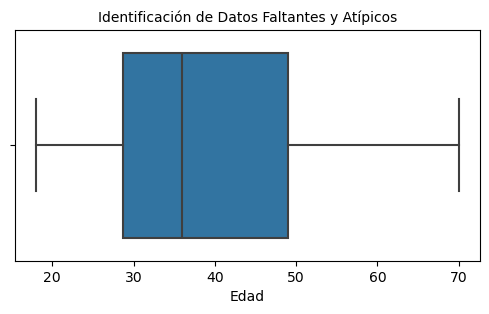

In [6]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Edad']) # Age = Edad
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

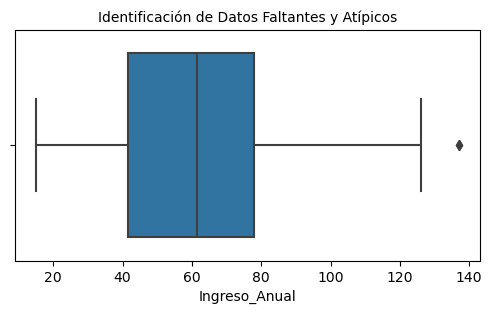

In [7]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Ingreso_Anual']) # Age = Edad
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

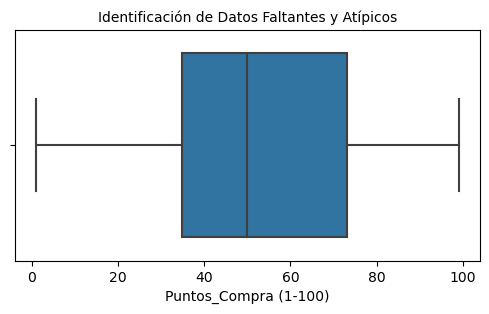

In [8]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Puntos_Compra (1-100)']) # Age = Edad
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [9]:
print("Cantidad de Registros con cero en Cedula: ", Datos['Cedula'].isin([0]).sum())
print("Cantidad de Registros con cero en Genero: ", Datos['Genero'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ", Datos['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingreso Anual: ", Datos['Ingreso_Anual'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuacion de Compras: ", Datos['Puntos_Compra (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Cedula:  0
Cantidad de Registros con cero en Genero:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingreso Anual:  0
Cantidad de Registros con cero en Puntuacion de Compras:  0


In [10]:
#Conteo Datos Atípicos

# Niveles de puntajes desde el minimo hasta el maximo

puntaje_mix=0
puntaje_max=100
Total_Atipicos=((Datos['Puntos_Compra (1-100)']<puntaje_mix)|(Datos['Puntos_Compra (1-100)']>puntaje_max)).sum()
print("El total de datos atipicos es: {}".format(Total_Atipicos))

El total de datos atipicos es: 0


In [11]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cedula                 200 non-null    int64 
 1   Genero                 200 non-null    object
 2   Edad                   200 non-null    int64 
 3   Ingreso_Anual          200 non-null    int64 
 4   Puntos_Compra (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [12]:
Datos = Datos [['Edad','Ingreso_Anual','Puntos_Compra (1-100)']]

In [13]:
Datos.head(10)

,Edad,Ingreso_Anual,Puntos_Compra (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


<Axes: xlabel='Edad', ylabel='Ingreso_Anual'>

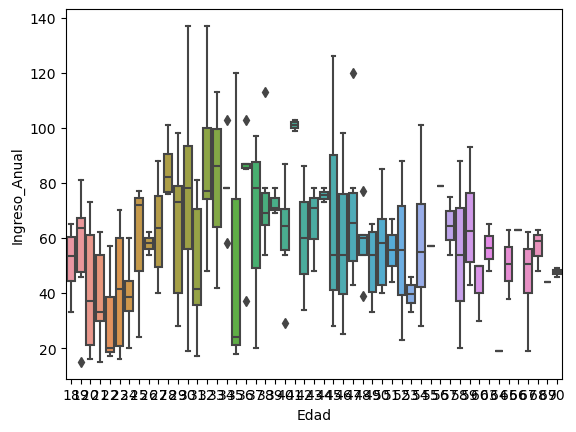

In [14]:
sns.boxplot(x='Edad', y='Ingreso_Anual', data=Datos)

<Axes: xlabel='Ingreso_Anual', ylabel='Puntos_Compra (1-100)'>

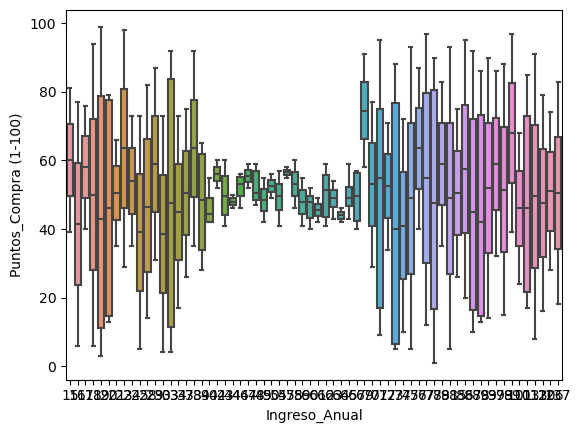

In [15]:
sns.boxplot(x='Ingreso_Anual', y='Puntos_Compra (1-100)', data=Datos)

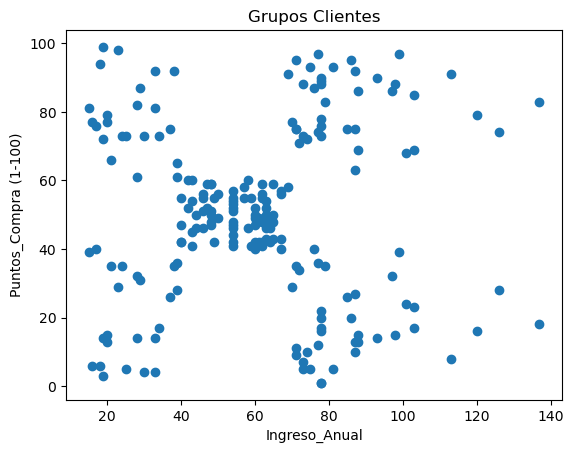

In [16]:
#Grafico antes del agrupamiento.

plt.scatter(Datos['Ingreso_Anual'], Datos['Puntos_Compra (1-100)'])
plt.xlabel('Ingreso_Anual')
plt.ylabel('Puntos_Compra (1-100)')
plt.title('Grupos Clientes')
plt.show()

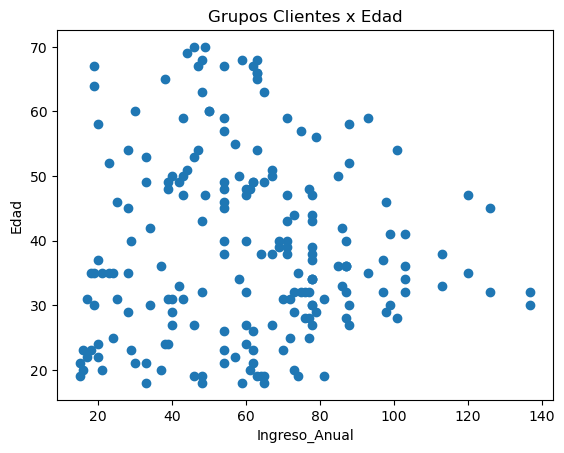

In [17]:
#Grafico antes del agrupamiento.

plt.scatter(Datos['Ingreso_Anual'], Datos['Edad'])
plt.xlabel('Ingreso_Anual')
plt.ylabel('Edad')
plt.title('Grupos Clientes x Edad')
plt.show()

**4. Entrenar el modelo configurando los diferentes hiperparámetros**

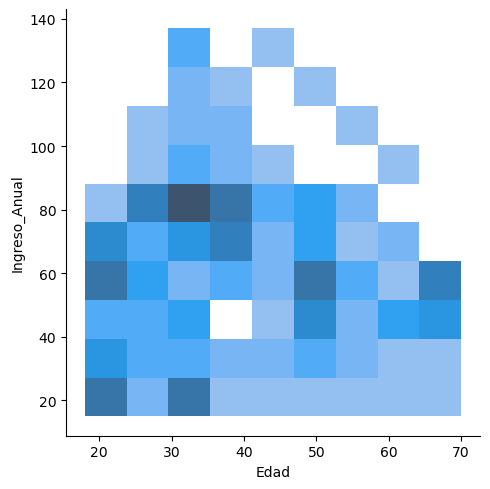

In [18]:
sns.displot(data=Datos,x="Edad",y="Ingreso_Anual")

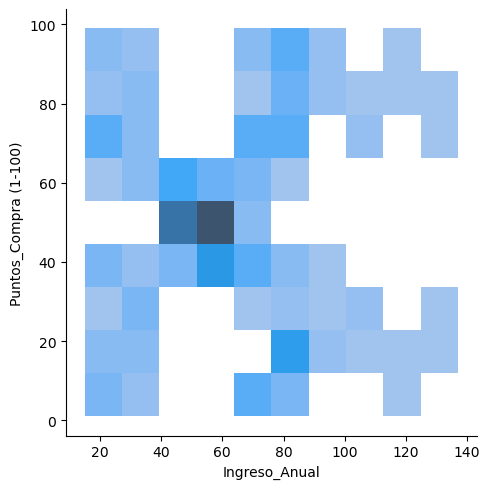

In [19]:
sns.displot(data=Datos,x="Ingreso_Anual",y="Puntos_Compra (1-100)")

In [20]:
X = Datos [['Edad', 'Ingreso_Anual', 'Puntos_Compra (1-100)']].values

**5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.**

In [21]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
clustering.fit(X)

Datos['Cluster'] = clustering.labels_

silhouette_avg = silhouette_score (X, clustering.labels_)
davies_bouldin = davies_bouldin_score (X, clustering.labels_)
calinski_harabasz = calinski_harabasz_score (X, clustering.labels_)

print (f"Coeficiente Silueta: {silhouette_avg}")
print (f"Coeficiente Davies: {davies_bouldin}")
print (f"Coeficiente Calinski: {calinski_harabasz}")



Coeficiente Silueta: 0.41037986351850747
Coeficiente Davies: 0.8330032019223427
Coeficiente Calinski: 124.30185054821396


**6. Realizar las diferentes gráficas que permitan visualizar los resultados del model**

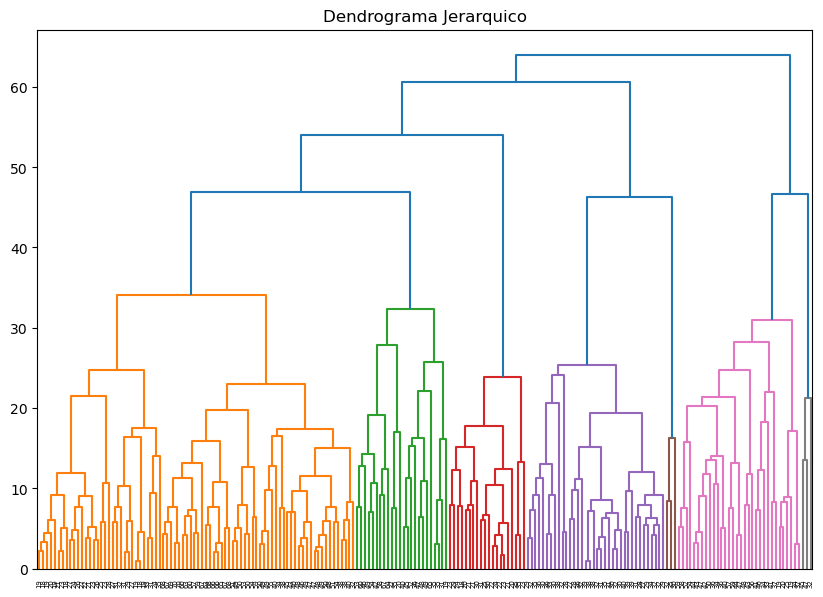

Coeficiente Silueta: 0.41037986351850747
Coeficiente Davies: 0.8330032019223427
Coeficiente Calinski: 124.30185054821396


In [22]:
linked = linkage(X, 'average')

plt.figure(figsize=(10,7))
dendrogram(linked,
           orientation='top',
           labels=Datos['Edad'].astype(str).values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma Jerarquico')
plt.show()

clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
clustering.fit(X)

Datos['Cluster'] = clustering.labels_

silhouette_avg = silhouette_score (X, clustering.labels_)
davies_bouldin = davies_bouldin_score (X, clustering.labels_)
calinski_harabasz = calinski_harabasz_score (X, clustering.labels_)

print (f"Coeficiente Silueta: {silhouette_avg}")
print (f"Coeficiente Davies: {davies_bouldin}")
print (f"Coeficiente Calinski: {calinski_harabasz}")